In [18]:
import subprocess
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import os

In [19]:
from src.MOEDA import MOEDA
from src import variation

N = 5

# 2a
# L = [20]
# populationSizes = [[100], [100]]

# 2c
elitsmSettings = [True, False]
L = [10, 20] # number of (discrete) variables
populationSizes = [
	[1000, 1000],
	[1000, 1000]
]

# Group
# elitsmSettings = [True]
# L = [15, 30, 60] # number of (discrete) variables
# populationSizes = [
# 	[609, 1062, 1862]
# ]

for i, l in enumerate(L):
	hypervolume_results_per_setting = []
	for j, elitsm in enumerate(elitsmSettings):
		hypervolume_results = []
		for n in range(N):
			populationSize = populationSizes[j][i]
			EA = MOEDA(populationSize = populationSize,
					numberOfVariables = l,
					numberOfEvaluations = 10**4,
					fitnessFunction = 'knapsack',
					selection=variation.selection, variation_model=variation.marginalProductModel, mutation=variation.mutation,
					tournamentSize = 2, mutationProb = 'auto',
					randomSeed = 30,
					elitism=elitsm)
			EA.evolve() # Run algorithm
			hypervolume_results.append([EA.numberOfEvaluationsByGeneration, EA.hyperVolumeByGeneration])
		hypervolume_results_per_setting.append(hypervolume_results)
	np.save(('data/hypervolume_results_L_' + str(l) + '.npy'), hypervolume_results_per_setting)

#sizes of EA.hyperVolumeByGeneration and EA.numberOfEvaluationsByGeneration are equal
print('hypervolumes:', EA.hyperVolumeByGeneration) #print array of hypervolumes
print('#feval:', EA.numberOfEvaluationsByGeneration) #print array of #feval

 90%|█████████ | 9/10 [00:32<00:03,  3.60s/it]

hypervolumes: [0.3845754453231088, 0.38493789440051107, 0.386881939452033, 0.391111510504034, 0.39493869318635694, 0.3951973001038423, 0.3953840162952313, 0.39561666267273743, 0.3963944803898075]
#feval: [2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]


ValueError: x and y must have same first dimension, but have shapes (9,) and (2, 9)

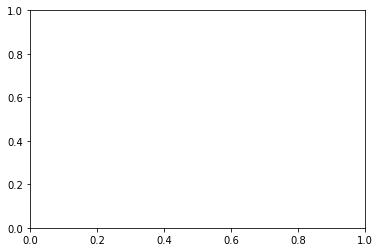

In [20]:
domain = EA.numberOfEvaluationsByGeneration
for i in range(len(hypervolume_results_per_setting)):
	res = hypervolume_results_per_setting[i]
	interdecile_range_low = np.percentile(res, 10, axis=0)
	interdecile_range_high = np.percentile(res, 90, axis=0)

	average = np.average(res, axis=0)

	plt.plot(domain, average)
	plt.fill_between(domain,
		interdecile_range_low,
		interdecile_range_high,
					alpha=0.3)
plt.legend(L) # [("l = " + x) for x in L]
plt.show()